<a href="https://colab.research.google.com/github/Muskankalonia/MNIST-Dataset-Classification-Using-Python-Sklearn/blob/main/MNIST_DATASET_CLASSIFICATION_PROBLEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

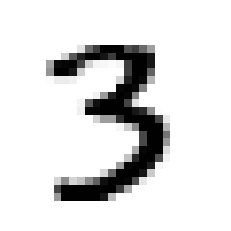

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[10000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
y[10000]

'3'

In [6]:
import numpy as np
y = y.astype(np.uint8)

In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.9496 , 0.9624 , 0.96275])

In [ ]:
from sklearn.base import BaseEstimator

class Never3Classifier(BaseEstimator): 
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_3_clf = Never3Classifier()
cross_val_score(never_3_clf, X_train, y_train_3, cv=3, scoring="accuracy") 

array([0.8962 , 0.89975, 0.8975 ])

In [ ]:
#thus accuracy is not the correct performance measure of classifier so now we will use confusion matrix

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_3,cv=3)

In [ ]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3,y_train_pred)

array([[53477,   392],
       [ 2113,  4018]])

In [ ]:
#a perfect classifier would have only true positives and true negatives thus the diagonal would be zero in the 
#confusion matrix

#computing precision and recall matrix
from sklearn.metrics import recall_score, precision_score
precision_score(y_train_3, y_train_pred)  

0.9111111111111111

In [ ]:
recall_score(y_train_3,y_train_pred) 

0.655358016636764

In [ ]:
#calculating F1 score the harmonic mean of precision and recall

from sklearn.metrics import f1_score
f1_score(y_train_3,y_train_pred)

0.7623565126648326

In [ ]:
#using decision function to get scores of a particular instance in order to change the threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3111.29165686])

In [ ]:
threshold = 0
y_some_digit_predict = (y_scores>threshold)
y_some_digit_predict

array([ True])

In [ ]:
threshold = 8000
y_some_digit_predict = (y_scores>threshold)
y_some_digit_predict  #recall decreases with increase in thresholds

array([False])

In [ ]:
#to find the scores of every instance
y_scores = cross_val_predict(sgd_clf,X_train,y_train_3,cv=3, method = "decision_function")

In [ ]:
#with the y_scores we can get precision and recall for every possible threshold using precision recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_3,y_scores)

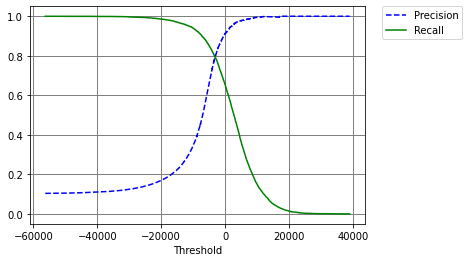

In [ ]:
#plot the curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plot_precision_recall_vs_threshold(precision, recall, thresholds) 
plt.show()



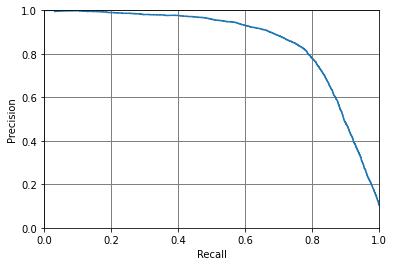

In [ ]:
#plot precision directly against recall
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()

In [ ]:
#we would want the lowest threshold that gives 90% precision

threshold_95_precision = thresholds[np.argmax(precision>=0.95)]

In [ ]:
#to make prediction on the training set
y_train_pred_95 = (y_scores>=threshold_95_precision)

precision_score(y_train_3,y_train_pred_95)

0.9500717360114778

In [ ]:
recall_score(y_train_3,y_train_pred_95)

0.5400424074376121

In [ ]:
#roc curve recall vs specificity
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_3,y_scores)

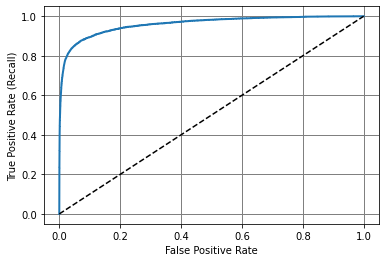

In [ ]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plot_roc_curve(fpr, tpr) 
plt.show()

In [ ]:
#to compare classifier we need to find area under the curve a perfect classifier has area = 1
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3, y_scores)
#it takes into consideration the false negatives more than the false positives 

0.9599243001892759

In [ ]:
# Now train the randomForestClassifier to compare
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42, n_estimators=100)
y_prob_forest = cross_val_predict(forest_clf,X_train,y_train_3,cv=3,method="predict_proba")

In [ ]:
#to plot the roc we need scores not probability so we use prob of positive class as scores
y_scores_forest = y_prob_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)


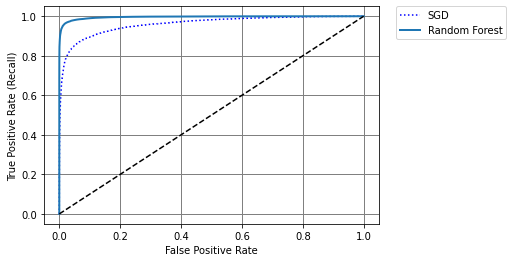

In [ ]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
roc_auc_score(y_train_3,y_scores_forest)

0.995864544068936

In [ ]:
#multiclass classifiers
sgd_clf.fit(X_train,y_train) #sklearn itself runs ova
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-38381.84662607, -39529.34366106, -12155.98503296,
         11177.09850761, -11548.09310547,  -5601.80465911,
        -47152.82643624,  -8228.89440869,  -4877.28507188,
        -12045.26846117]])

In [ ]:
np.argmax(some_digit_scores) #highest scored label

3

In [ ]:
sgd_clf.classes_ #target classes is stored in the classes attribute

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
sgd_clf.classes_[3]

3

In [ ]:
#to force sklearn to use ovo classifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=1000,random_state = 42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
len(ovo_clf.estimators_)

45

In [ ]:
#training random forest classifier
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
#scaling the inputs shall increase the accuracy
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mtx = confusion_matrix(y_train,y_train_pred)
conf_mtx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

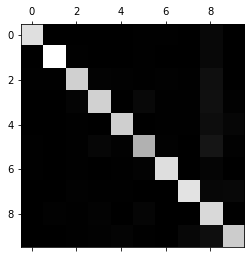

In [ ]:
plt.matshow(conf_mtx,cmap = plt.cm.gray)
plt.show()

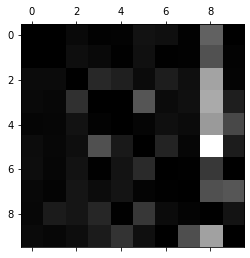

In [ ]:
row_sums = conf_mtx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mtx/row_sums
#now lets see the errors only and fill diagonals = 0
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)
plt.show()

In [9]:
#multilabel classifier

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.predict([some_digit]) #output is false true as 3 is less than 7 but odd

array([[False,  True]])

In [ ]:
#now computing the f1 score
y_train_knn_predict = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_predict,average = "macro")

0.976410265560605

In [1]:
#the multilable classifier assumes that all the labels are equally important

In [11]:
#multioutput classification
noise = np.random.randint(0, 100, (len(X_train), 784)) 
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784)) 

X_test_mod = X_test + noise
y_train_mod = X_train 
y_test_mod = X_test


In [15]:
knn_clf.fit(X_train_mod, y_train_mod)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')